In [16]:
import numpy as np
import pandas as pd

In [17]:
with open('takehome_users.csv') as f:
    print(f)
with open('takehome_user_engagement.csv') as f:
    print(f)

<_io.TextIOWrapper name='takehome_users.csv' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='takehome_user_engagement.csv' mode='r' encoding='cp1252'>


In [18]:
users = pd.read_csv('takehome_users.csv', parse_dates=['creation_time'], encoding='cp1252')
engagements = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'], encoding='cp1252')

print('users shape: {}'.format(users.shape))
print('engagements shape: {}'.format(engagements.shape))

users shape: (12000, 10)
engagements shape: (207917, 3)


In [19]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [21]:
engagements.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [23]:
import math

users['creation_weekday'] = users['creation_time'].dt.dayofweek
users['creation_month'] = users['creation_time'].dt.month
users['invited'] = [0 if math.isnan(id) else 1 for id in users.invited_by_user_id]
users['domain'] = users['email'].str.split('@').str[1]
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_weekday,creation_month,invited,domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,4,1,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,4,11,1,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,3,1,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,5,1,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,3,1,1,yahoo.com


In [24]:
users.domain.value_counts().head(10)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
qgjbc.com            2
rerwl.com            2
luque.com            2
mumdc.com            2
Name: domain, dtype: int64

In [25]:
domains = list(users.domain.value_counts().head(6).index)
users['domain'] = [domain if domain in domains else 'other' for domain in users.domain]
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_weekday,creation_month,invited,domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,4,1,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,4,11,1,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,3,1,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,5,1,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,3,1,1,yahoo.com


In [26]:
from datetime import timedelta

def adopted(user):
    dates = engagements[engagements.user_id == user].time_stamp.sort_values()
    adopted = []
    for date in dates:
        if dates[(dates >= date) & (dates <= date + timedelta(days=6))].nunique() >= 3:
            adopted.append(1)
        else:
            adopted.append(0)   
    if sum(adopted) > 0:
        return 1
    else:
        return 0


from tqdm._tqdm_notebook import tqdm_notebook

tqdm_notebook.pandas()
users['adopted'] = users['object_id'].progress_apply(adopted)

users.head()

C:\Users\Billy\anaconda3\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_weekday,creation_month,invited,domain,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,4,1,yahoo.com,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,4,11,1,gustr.com,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,3,1,gustr.com,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,5,1,yahoo.com,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,3,1,1,yahoo.com,0


In [27]:
users = users.drop(['object_id','creation_time','name','email','last_session_creation_time','org_id','invited_by_user_id'], axis=1)
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,creation_weekday,creation_month,invited,domain,adopted
0,GUEST_INVITE,1,0,1,4,1,yahoo.com,0
1,ORG_INVITE,0,0,4,11,1,gustr.com,1
2,ORG_INVITE,0,0,1,3,1,gustr.com,0
3,GUEST_INVITE,0,0,1,5,1,yahoo.com,0
4,GUEST_INVITE,0,0,3,1,1,yahoo.com,0


In [28]:
users = pd.get_dummies(users, columns=['creation_source', 'creation_weekday', 'creation_month', 'domain'], drop_first=True)
users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_weekday_1,creation_weekday_2,...,creation_month_9,creation_month_10,creation_month_11,creation_month_12,domain_gmail.com,domain_gustr.com,domain_hotmail.com,domain_jourrapide.com,domain_other,domain_yahoo.com
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<h2>1. Using Correlation Matrix</h2>

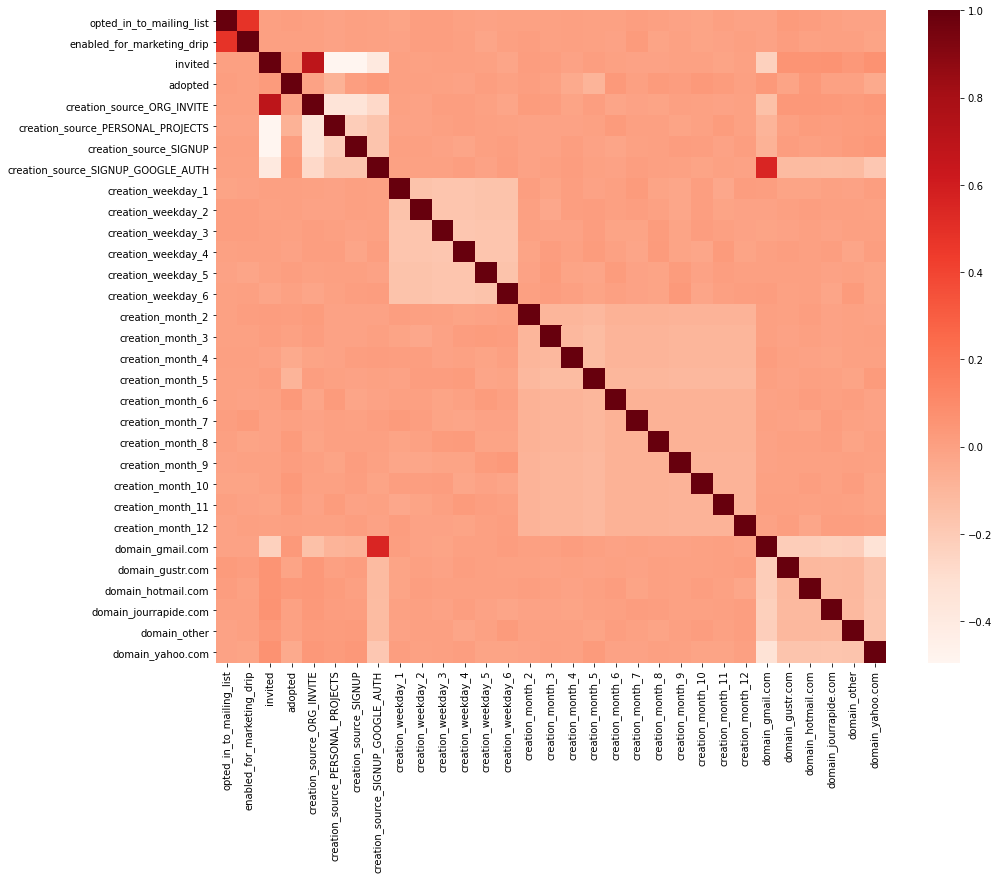

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(15,12))
cor = users.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [39]:
abs(cor['adopted']).sort_values(ascending=False)

adopted                               1.000000
creation_month_5                      0.091007
creation_source_PERSONAL_PROJECTS     0.075817
creation_month_4                      0.041365
domain_yahoo.com                      0.039938
creation_month_6                      0.036209
domain_gmail.com                      0.036186
creation_source_SIGNUP_GOOGLE_AUTH    0.036119
domain_hotmail.com                    0.034321
creation_month_10                     0.033680
invited                               0.027671
creation_month_8                      0.026005
creation_month_11                     0.022882
creation_month_9                      0.016472
domain_gustr.com                      0.011851
creation_source_SIGNUP                0.009299
creation_month_2                      0.008515
opted_in_to_mailing_list              0.008097
creation_weekday_5                    0.007986
creation_weekday_4                    0.007672
creation_source_ORG_INVITE            0.007636
creation_week

In [34]:
users[['opted_in_to_mailing_list', 'enabled_for_marketing_drip']].corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip
opted_in_to_mailing_list,1.000000,0.483529
enabled_for_marketing_drip,0.483529,1.000000


In [35]:
users[['creation_source_ORG_INVITE', 'invited']].corr()

,creation_source_ORG_INVITE,invited
creation_source_ORG_INVITE,1.000000,0.691238
invited,0.691238,1.000000


In [36]:
users[['creation_source_SIGNUP_GOOGLE_AUTH', 'domain_gmail.com']].corr()

,creation_source_SIGNUP_GOOGLE_AUTH,domain_gmail.com
creation_source_SIGNUP_GOOGLE_AUTH,1.000000,0.555953
domain_gmail.com,0.555953,1.000000


<h2>2.Using Sklearn Feature Importance</h2>

In [43]:
y = users['adopted']
X = users.drop(['adopted'], axis=1)

In [44]:
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_weekday_1,creation_weekday_2,creation_weekday_3,...,creation_month_9,creation_month_10,creation_month_11,creation_month_12,domain_gmail.com,domain_gustr.com,domain_hotmail.com,domain_jourrapide.com,domain_other,domain_yahoo.com
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [45]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: adopted, dtype: int64

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

RandomForestClassifier(random_state=42)

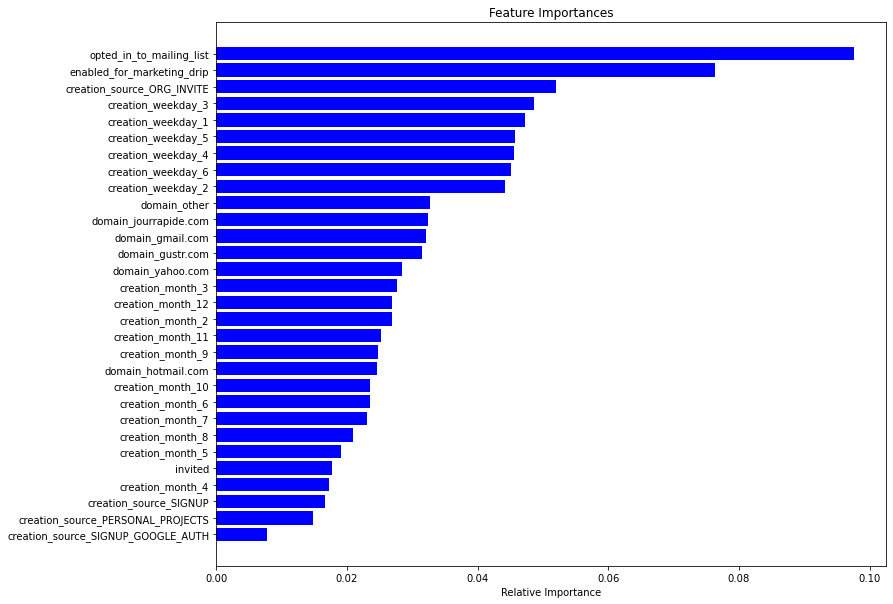

In [53]:
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()